**Proyecto 1 "Relación Minutos Ingreso”**

**Nombres de los integrantes del grupo:**

CRISTIAN FELIPE BARBOSA TUNJANO
DAVID BORRERO DIAZ
MICHAEL ALEJANDRO GOMEZ RAMIREZ
NICOLAS SUAREZ

**Una explicación breve del problema teniendo en cuenta lo siguiente:**

Este estudio tiene como objetivo investigar la relación entre el total de minutos utilizados por los clientes y sus ingresos totales en una empresa de telecomunicaciones. Utilizando la base Credito_dias.csv, emplearemos un enfoque que combina análisis estadístico, descriptivo, visualización de datos y técnicas de modelado predictivo como la correlación y regresión lineal. Además, consideraremos variables adicionales como la posesión de tarjeta de crédito y la antigüedad. Este enfoque nos permitirá identificar posibles relaciones lineales entre las variables de estudio, sino que también proporcionará valiosos insights para la toma de decisiones estratégicas en la mejora de productos y campañas publicitarias de la empresa.

In [1]:
# prompt: puedes crear una carpeta de esta base de git https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv

import os
import requests

url = "https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv"
response = requests.get(url)

if response.status_code == 200:
  with open("Credito_dias.csv", "wb") as f:
    f.write(response.content)
  print("Carpeta creada exitosamente")
else:
  print("Error al crear la carpeta")


Carpeta creada exitosamente


In [2]:
# prompt: quiero ver las variables de la base y su tipo

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("Credito_dias.csv")

# Print the data types of each column
print(df.dtypes)


totmou         float64
totrev         float64
creditcd        object
eqpdays          int64
Customer_ID      int64
dtype: object


In [3]:
# prompt: cambiale nos nombres a las variables, totrev: Ingresos del cliente.totmou: Total de minutos usados por el cliente.
# creditcd: Indicador de tarjeta de crédito.
# eqpdays: Número de días (antigüedad) del equipo actual.

df = df.rename(columns={
    'totrev': 'Ingresos_cliente',
    'totmou': 'Total_minutos_usados',
    'creditcd': 'Indicador_tarjeta_credito',
    'eqpdays': 'Antiguedad_equipo_actual'
})

print(df.dtypes)

Total_minutos_usados         float64
Ingresos_cliente             float64
Indicador_tarjeta_credito     object
Antiguedad_equipo_actual       int64
Customer_ID                    int64
dtype: object


In [4]:
# prompt: puedes borrar de los datos de total minutos usados todo lo que este despues del punto

df['Total_minutos_usados'] = df['Total_minutos_usados'].astype(str)
df['Total_minutos_usados'] = df['Total_minutos_usados'].apply(lambda x: x.split('.')[0])
df['Total_minutos_usados'] = df['Total_minutos_usados'].astype(int)
print(df)


      Total_minutos_usados  Ingresos_cliente Indicador_tarjeta_credito  \
0                     7269            906.58                         Y   
1                    13552           1172.25                         N   
2                     4152            577.39                         Y   
3                     1863            294.26                         Y   
4                     4155            433.16                         N   
...                    ...               ...                       ...   
9995                  2570            484.31                         Y   
9996                  2105            583.36                         Y   
9997                  3690            294.29                         Y   
9998                  3333            233.08                         Y   
9999                  5025           1436.49                         Y   

      Antiguedad_equipo_actual  Customer_ID  
0                          371      1082423  
1                  

In [5]:
# prompt: puedes redondear los datos de la variable ingresos cliente y dejarla en un numero entero //

df['Ingresos_cliente'] = df['Ingresos_cliente'].round(0).astype(int)
print(df.dtypes)


Total_minutos_usados          int64
Ingresos_cliente              int64
Indicador_tarjeta_credito    object
Antiguedad_equipo_actual      int64
Customer_ID                   int64
dtype: object


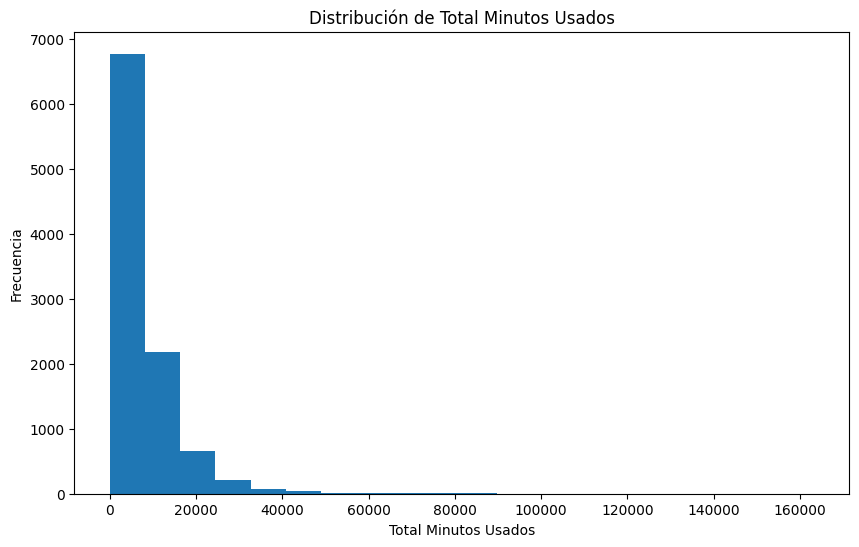

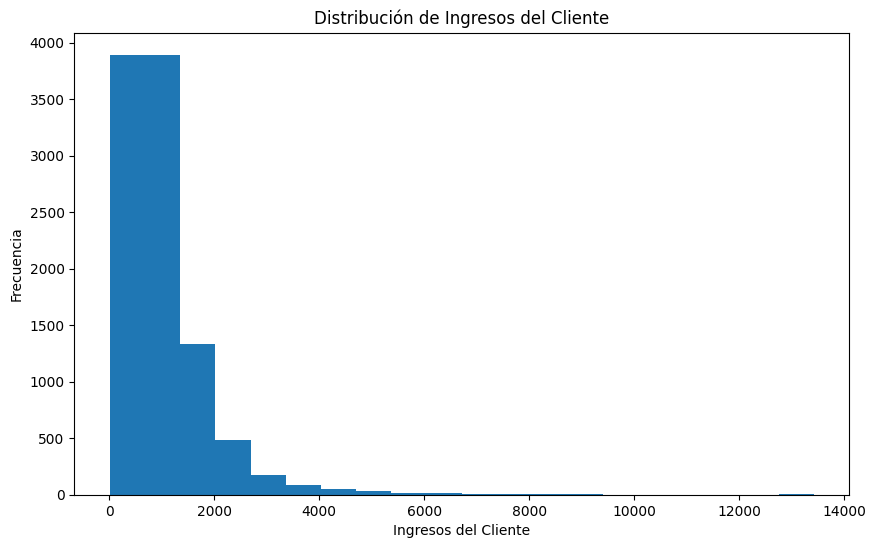

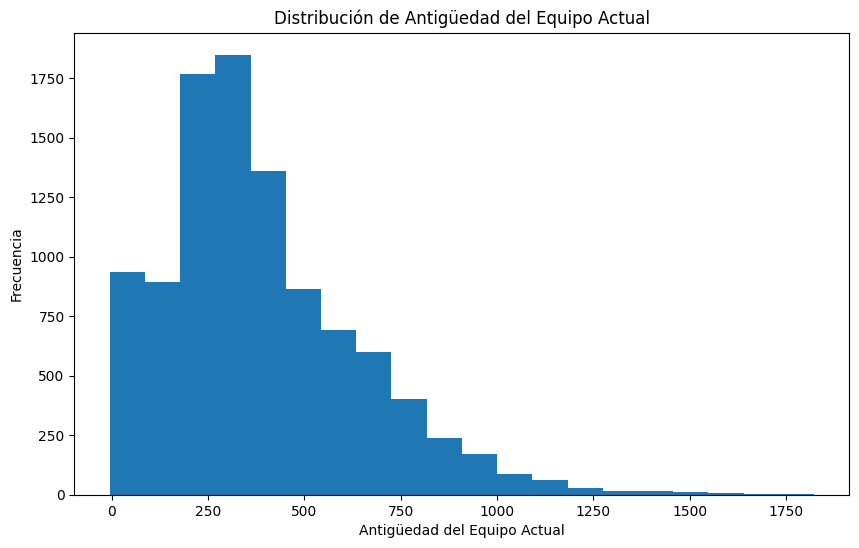

In [6]:
# prompt: puedes ahcer un histograma para la variable total minutos, Ingresos_cliente, Antiguedad_equipo_actual por separado

import matplotlib.pyplot as plt

# Histogram for Total_minutos_usados
plt.figure(figsize=(10, 6))
plt.hist(df['Total_minutos_usados'], bins=20)
plt.title('Distribución de Total Minutos Usados')
plt.xlabel('Total Minutos Usados')
plt.ylabel('Frecuencia')
plt.show()

# Histogram for Ingresos_cliente
plt.figure(figsize=(10, 6))
plt.hist(df['Ingresos_cliente'], bins=20)
plt.title('Distribución de Ingresos del Cliente')
plt.xlabel('Ingresos del Cliente')
plt.ylabel('Frecuencia')
plt.show()

# Histogram for Antiguedad_equipo_actual
plt.figure(figsize=(10, 6))
plt.hist(df['Antiguedad_equipo_actual'], bins=20)
plt.title('Distribución de Antigüedad del Equipo Actual')
plt.xlabel('Antigüedad del Equipo Actual')
plt.ylabel('Frecuencia')
plt.show()


In [7]:
# prompt: puedes borrar los filas en donde no tenga datos la variable Indicador_tarjeta_credito

df = df[df['Indicador_tarjeta_credito'].notnull()]


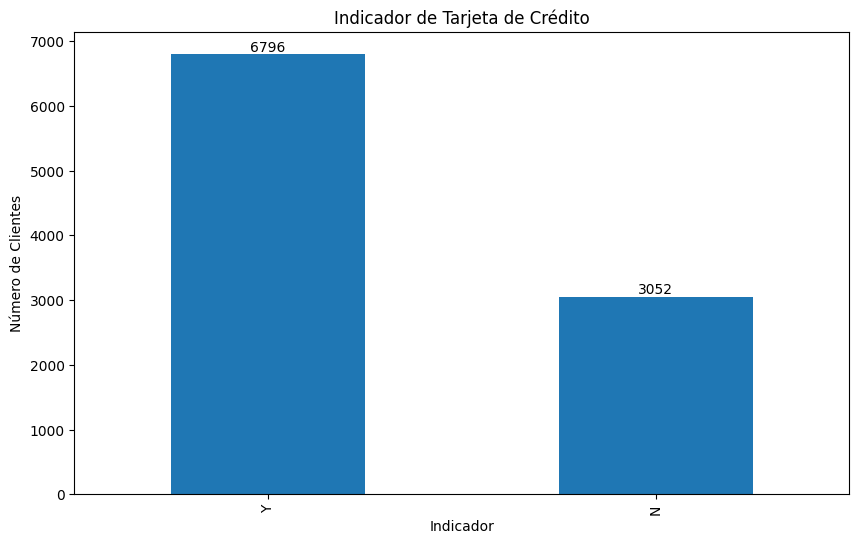

In [8]:
# prompt: puedes hacer un diagrama de barras para la variable Indicador_tarjeta_credito y numero de clientes, y que el diagrama me diga la cantidad en la imagen

import matplotlib.pyplot as plt
# Create a bar chart for Indicador_tarjeta_credito
plt.figure(figsize=(10, 6))
df['Indicador_tarjeta_credito'].value_counts().plot(kind='bar')
plt.title('Indicador de Tarjeta de Crédito')
plt.xlabel('Indicador')
plt.ylabel('Número de Clientes')
for i, v in enumerate(df['Indicador_tarjeta_credito'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()


In [9]:
# prompt: me puedes mostrar los coeficientes de correlacion entre las variables ingresos clientes y toal minutos usados

# Calculate the correlation coefficient between Ingresos_cliente and Total_minutos_usados
correlation = df['Ingresos_cliente'].corr(df['Total_minutos_usados'])

# Print the correlation coefficient
print(f"Correlation coefficient between Ingresos_cliente and Total_minutos_usados: {correlation:.2f}")


Correlation coefficient between Ingresos_cliente and Total_minutos_usados: 0.84


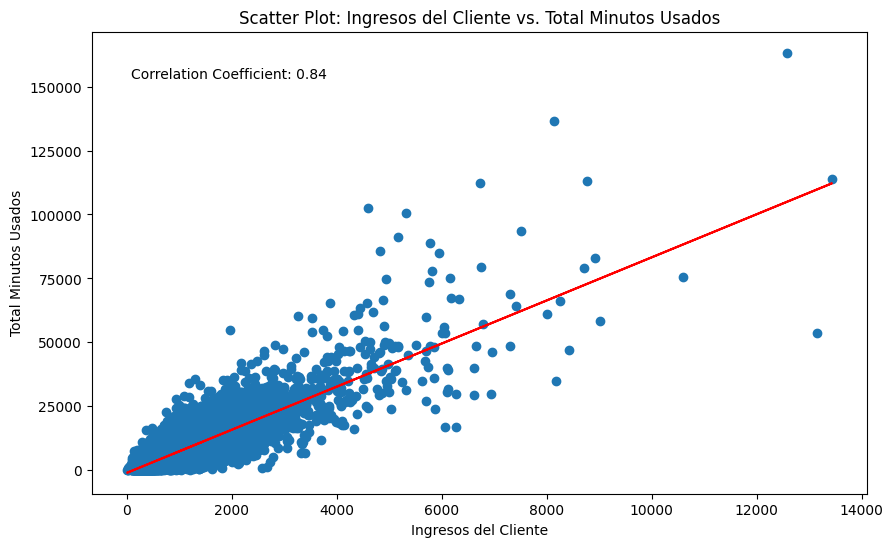

In [10]:
# prompt: Hazun diagrama de dispersión entre las variables  Ingresos del cliente y Total de minutos usados por el cliente y que tenga la linea de tendencia yq ue tambien tenga su coeficiente de correlacion

import matplotlib.pyplot as plt
import numpy as np
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Ingresos_cliente'], df['Total_minutos_usados'])
plt.title('Scatter Plot: Ingresos del Cliente vs. Total Minutos Usados')
plt.xlabel('Ingresos del Cliente')
plt.ylabel('Total Minutos Usados')

# Calculate the correlation coefficient
correlation = df['Ingresos_cliente'].corr(df['Total_minutos_usados'])

# Add the correlation coefficient to the plot
plt.text(0.05, 0.90, f'Correlation Coefficient: {correlation:.2f}', transform=plt.gca().transAxes)

# Add the regression line
m, b = np.polyfit(df['Ingresos_cliente'], df['Total_minutos_usados'], 1)
plt.plot(df['Ingresos_cliente'], m*df['Ingresos_cliente'] + b, color='red')

plt.show()


existe una relación bastante fuerte entre el total de minutos usados con la compañía y el ingreso total de los clientes, dado que el coeficiente de correlación es de 0.84. Este valor indica una correlación positiva fuerte, lo que significa que a medida que aumenta el total de minutos usados, también tiende a aumentar el ingreso total de los clientes. Un coeficiente de 0.84 sugiere que la relación es significativa, aunque no perfecta, lo que implica que otros factores también podrían influir en los ingresos del cliente además de los minutos usados.

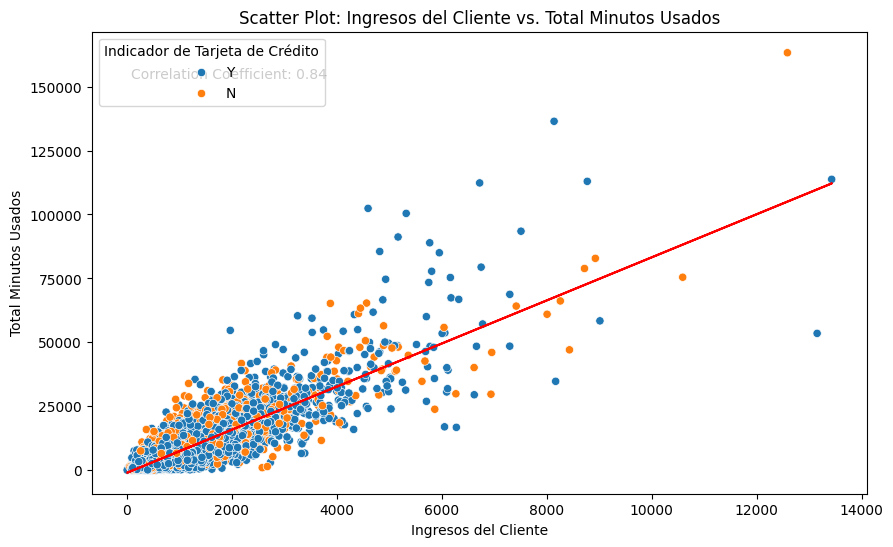

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a scatter plot with different colors based on Indicador_tarjeta_credito
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Ingresos_cliente", y="Total_minutos_usados", hue="Indicador_tarjeta_credito")

# Add a title and labels
plt.title('Scatter Plot: Ingresos del Cliente vs. Total Minutos Usados')
plt.xlabel('Ingresos del Cliente')
plt.ylabel('Total Minutos Usados')

# Add a legend
plt.legend(title="Indicador de Tarjeta de Crédito")

# Calculate the correlation coefficient
correlation = df['Ingresos_cliente'].corr(df['Total_minutos_usados'])

# Add the correlation coefficient to the plot
plt.text(0.05, 0.90, f'Correlation Coefficient: {correlation:.2f}', transform=plt.gca().transAxes)

# Add the regression line
m, b = np.polyfit(df['Ingresos_cliente'], df['Total_minutos_usados'], 1)
plt.plot(df['Ingresos_cliente'], m*df['Ingresos_cliente'] + b, color='red')

plt.show()


Agregar tarjeta de creadito no afecta las variables